In [1]:
import copy

# pandas library
import pandas as pd

# read dataset from csv file, and assign it to dataFrame
dataFrame = pd.read_csv('loan_data_set.csv')

# data preprocessing
# replace text values by numbers
dataFrame['Dependents'].replace('3+', 3, inplace=True)
dataFrame['Loan_Status'].replace('N', 0, inplace=True)
dataFrame['Loan_Status'].replace('Y', 1, inplace=True)
dataFrame['Gender'].replace('Male', 1, inplace=True)
dataFrame['Gender'].replace('Female', 0, inplace=True)
dataFrame['Married'].replace('Yes', 1, inplace=True)
dataFrame['Married'].replace('No', 0, inplace=True)
dataFrame['Education'].replace('Graduate', 1, inplace=True)
dataFrame['Education'].replace('Not Graduate', 0, inplace=True)
dataFrame['Self_Employed'].replace('Yes', 1, inplace=True)
dataFrame['Self_Employed'].replace('No', 0, inplace=True)
# replace missing values by mean
dataFrame['LoanAmount'].fillna(dataFrame['LoanAmount'].mean(), inplace=True)
# replace missing values by mode
dataFrame['Gender'].fillna(dataFrame['Gender'].mode()[0], inplace=True)
dataFrame['Married'].fillna(dataFrame['Married'].mode()[0], inplace=True)
dataFrame['Dependents'].fillna(dataFrame['Dependents'].mode()[0], inplace=True)
dataFrame['Self_Employed'].fillna(dataFrame['Self_Employed'].mode()[0], inplace=True)
dataFrame['Credit_History'].fillna(dataFrame['Credit_History'].mode()[0], inplace=True)
dataFrame['Loan_Amount_Term'].fillna(dataFrame['Loan_Amount_Term'].mode()[0], inplace=True)

# drop unused cell
dataFrame = dataFrame.drop('Loan_ID', axis=1)

# input is all cells except loan status
X = dataFrame.drop('Loan_Status', axis=1)
# output is loan status cell only
y = dataFrame['Loan_Status']

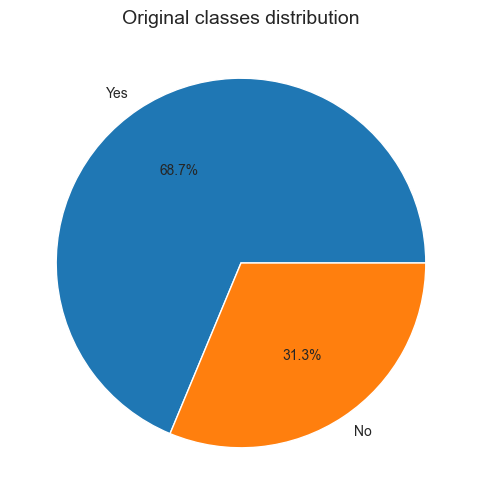

In [2]:
# preview distribution ratios of the classes
# draw library
import matplotlib.pyplot as plt
ax = plt.subplots(figsize=(6, 6))[1]
# calculate values count in each class
cv = y.value_counts()
# indexes list
numericalLabels = cv.index.to_list()
# values list
realLabels = list(map(lambda x: 'No' if (x == 0) else 'Yes', numericalLabels))

#draw
ax.pie(x=cv, labels= realLabels, autopct='%1.1f%%')
ax.set_title('Original classes distribution', fontsize=14)
plt.draw()

Text(0.5, 1.0, 'New classes distribution')

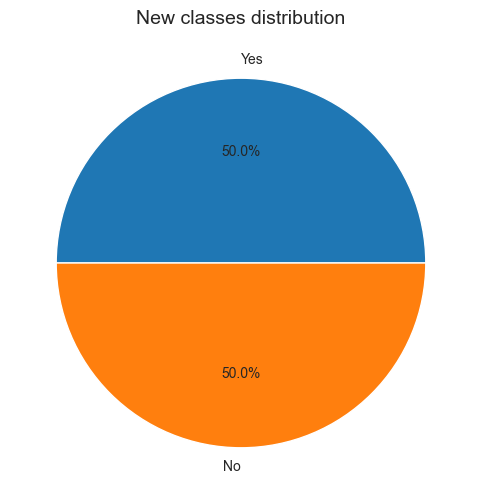

In [3]:
# balancing classes library
from imblearn.over_sampling import SMOTE
# initialize object
oversample = SMOTE()
# balancing by adding new examples
X, y = oversample.fit_resample(X, y)

# calculate values count in each class
cv = y.value_counts()

#draw new classes distribution
ax = plt.subplots(figsize=(6, 6))[1]
ax.pie(x=cv, labels= realLabels, autopct='%1.1f%%')
ax.set_title('New classes distribution', fontsize=14)

In [4]:
# split data for training and testing library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

   Accuracy     |   Precision    |    Recall      |      F1        |      AUC       |
-------------------------------------------------------------------------------------
     78.70      |     79.01      |     77.11      |     78.05      |     78.67      |


<AxesSubplot:>

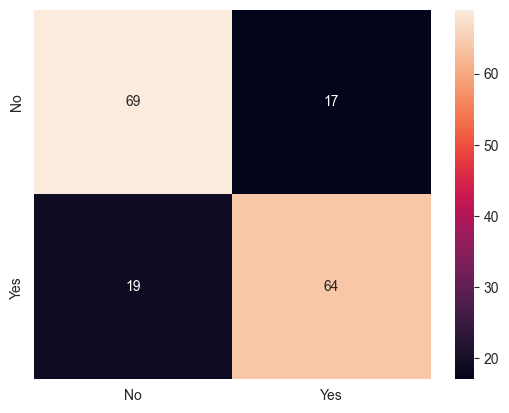

In [5]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# instance
decisionTreeModel = DecisionTreeClassifier()
#start training
decisionTreeModel.fit(X_train.values, y_train.values)

# calculate classification result with test data
decisionTree_y_pred = decisionTreeModel.predict(X_test.values)

# save trained model in file
from helpers import saveModel
saveModel('DTmodel', decisionTreeModel)

# evaluation Criteria
from helpers import *
# calculate evaluation Criteria by model training result with testing result
decisionTree_scores = calculateScores(y_test, decisionTree_y_pred)
formatScores(decisionTree_scores)
# noinspection PyDictCreation
allAlgorithmsScores = {}
allAlgorithmsScores['Decision Tree'] = decisionTree_scores
printScores(decisionTree_scores, withHeader=True)

xLabels = list(map(lambda x: 'No' if (x == 0) else 'Yes', y_test.unique()))
yLabels = list(map(lambda x: 'No' if (x == 0) else 'Yes', y_test.unique()))

# confusion matrix library
from sklearn.metrics import confusion_matrix
# calculate confusion matrix
decisionTreeConfusionMatrix = confusion_matrix(y_test, decisionTree_y_pred)
# draw confusion matrix
import seaborn as sns
sns.heatmap(decisionTreeConfusionMatrix, annot=True, xticklabels= xLabels, yticklabels=yLabels)

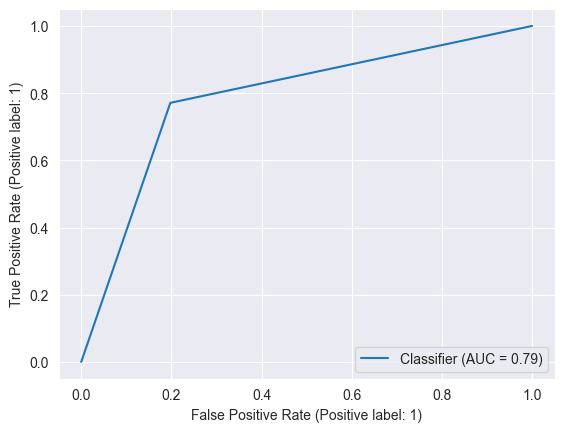

In [6]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=decisionTree_y_pred)
yAfter_test = copy.copy(y_test)

   Accuracy     |   Precision    |    Recall      |      F1        |      AUC       |
-------------------------------------------------------------------------------------
     72.78      |     65.29      |     95.18      |     77.45      |     73.17      |


<AxesSubplot:>

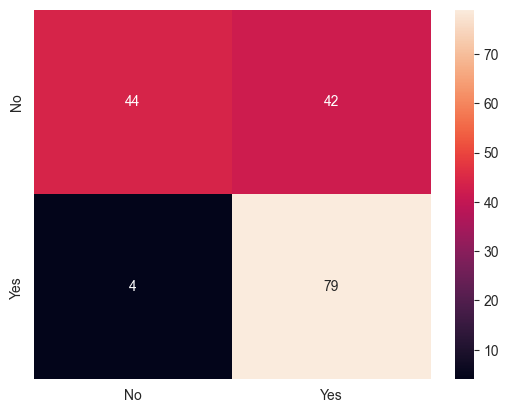

In [7]:
# Logistic regression classifier
from sklearn.linear_model import LogisticRegression
# instance
logisticRegressionModel = LogisticRegression(solver='liblinear', random_state=0)
#start training
logisticRegressionModel.fit(X_train, y_train)

# calculate classification result with test data
logisticRegression_y_pred = logisticRegressionModel.predict(X_test)

# save trained model in file
saveModel('LRmodel', logisticRegressionModel)

# calculate evaluation Criteria by model training result with testing result
logisticRegression_scores = calculateScores(y_test, logisticRegression_y_pred)
formatScores(logisticRegression_scores)
allAlgorithmsScores['Logistic Regression'] = logisticRegression_scores
printScores(logisticRegression_scores, withHeader=True)

# calculate confusion matrix
logisticRegressionConfusionMatrix = confusion_matrix(y_test, logisticRegression_y_pred)
# draw confusion matrix
sns.heatmap(logisticRegressionConfusionMatrix, annot=True, xticklabels= xLabels, yticklabels=yLabels)

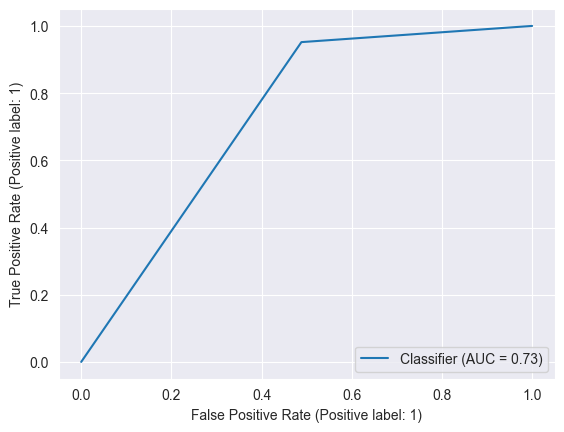

In [8]:
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=logisticRegression_y_pred)

   Accuracy     |   Precision    |    Recall      |      F1        |      AUC       |
-------------------------------------------------------------------------------------
     77.51      |     71.43      |     90.36      |     79.79      |     77.74      |


<AxesSubplot:>

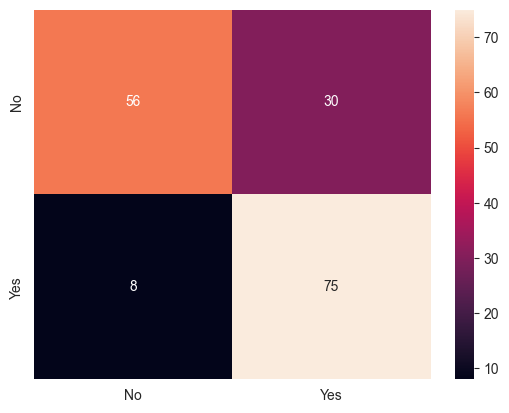

In [9]:
# Bayes regression classifier
from sklearn.naive_bayes import CategoricalNB
# instance
bayesModel = CategoricalNB()
#start training
bayesModel.fit(X_train, y_train)

# calculate classification result with test data
bayes_y_pred = bayesModel.predict(X_test)

# save trained model in file
saveModel('Bmodel', bayesModel)

# calculate evaluation Criteria by model training result with testing result
bayes_scores = calculateScores(y_test, bayes_y_pred)
formatScores(bayes_scores)
allAlgorithmsScores['Bayes'] = bayes_scores
printScores(bayes_scores, withHeader=True)

# calculate confusion matrix
bayesConfusionMatrix = confusion_matrix(y_test, bayes_y_pred)
# draw confusion matrix
sns.heatmap(bayesConfusionMatrix, annot=True, xticklabels= xLabels, yticklabels=yLabels)

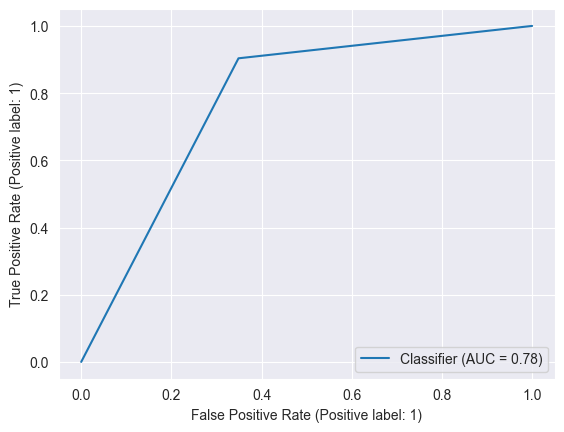

In [10]:
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=bayes_y_pred)

   Accuracy     |   Precision    |    Recall      |      F1        |      AUC       |
-------------------------------------------------------------------------------------
     59.76      |     58.06      |     65.06      |     61.36      |     59.86      |


<AxesSubplot:>

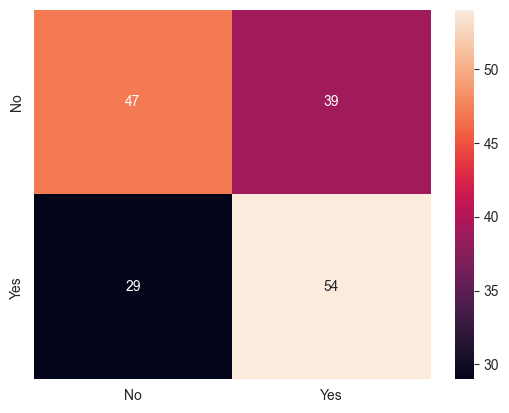

In [11]:
# KNN classifier
from sklearn.neighbors import KNeighborsRegressor
# instance
knnModel = KNeighborsRegressor(n_neighbors=3)
#start training
knnModel.fit(X_train, y_train)

# calculate classification result with test data
knn_y_pred = knnModel.predict(X_test).round()

# save trained model in file
saveModel('KNNmodel', knnModel)

# calculate evaluation Criteria by model training result with testing result
knn_scores = calculateScores(y_test, knn_y_pred)
formatScores(knn_scores)
allAlgorithmsScores['KNN'] = knn_scores
printScores(knn_scores, withHeader=True)

# calculate confusion matrix
knnConfusionMatrix = confusion_matrix(y_test, knn_y_pred)
# draw confusion matrix
sns.heatmap(knnConfusionMatrix, annot=True, xticklabels= xLabels, yticklabels=yLabels)

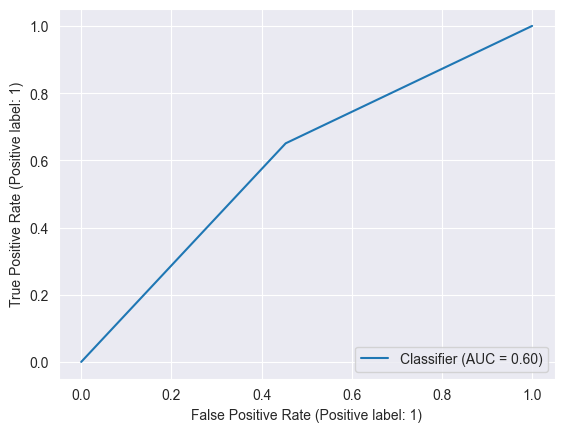

In [12]:
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=knn_y_pred)

   Accuracy     |   Precision    |    Recall      |      F1        |      AUC       |
-------------------------------------------------------------------------------------
     52.66      |     51.69      |     55.42      |     53.49      |     52.71      |


<AxesSubplot:>

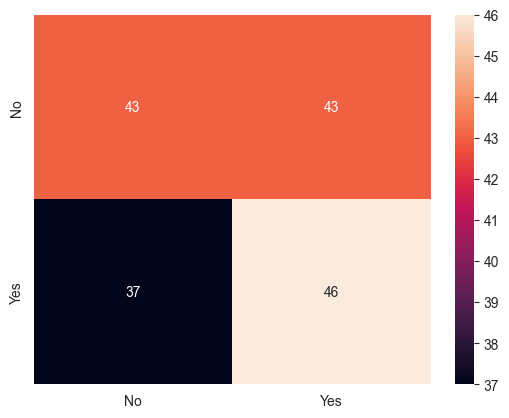

In [13]:
# SVM classifier
from sklearn.svm import SVC
# instance
svmModel = SVC()
#start training
svmModel.fit(X_train, y_train)

# calculate classification result with test data
svm_y_pred = svmModel.predict(X_test)

# save trained model in file
saveModel('SVMmodel', svmModel)

# calculate evaluation Criteria by model training result with testing result
svm_scores = calculateScores(y_test, svm_y_pred)
formatScores(svm_scores)
allAlgorithmsScores['SVM'] = svm_scores
printScores(svm_scores, withHeader=True)

# calculate confusion matrix
svmConfusionMatrix = confusion_matrix(y_test, svm_y_pred)
# draw confusion matrix
sns.heatmap(svmConfusionMatrix, annot=True, xticklabels= xLabels, yticklabels=yLabels)

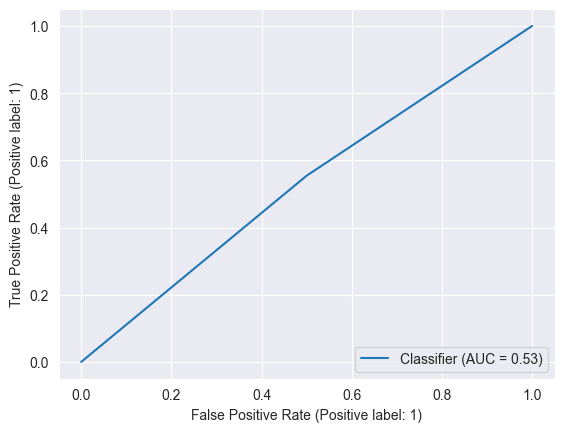

In [14]:
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=svm_y_pred)

In [15]:
printAllScores(allAlgorithmsScores)
# save scores
from helpers import saveScoresInFile
saveScoresInFile(allAlgorithmsScores)

           |    Decision Tree    | Logistic Regression |        Bayes        |         KNN         |         SVM         
-------------------------------------------------------------------------------------------------------------------------
Accuracy   |        78.70        |        72.78        |        77.51        |        59.76        |        52.66        
Precision  |        79.01        |        65.29        |        71.43        |        58.06        |        51.69        
Recall     |        77.11        |        95.18        |        90.36        |        65.06        |        55.42        
F1         |        78.05        |        77.45        |        79.79        |        61.36        |        53.49        
AUC        |        78.67        |        73.17        |        77.74        |        59.86        |        52.71        
-------------------------------------------------------------------------------------------------------------------------


'allTimesTrainedScores/2022-10-01T04_28_AM.json'

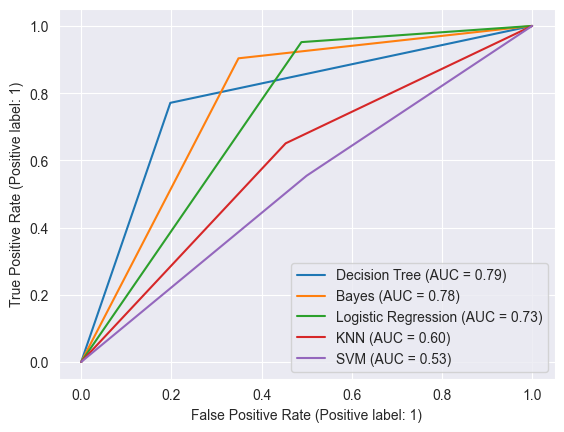

In [16]:
allAlgorithmsCurve = RocCurveDisplay.from_predictions(y_true=y_test, y_pred=decisionTree_y_pred, name='Decision Tree')
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=bayes_y_pred, name='Bayes', ax=allAlgorithmsCurve.ax_)
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=logisticRegression_y_pred, name='Logistic Regression',  ax=allAlgorithmsCurve.ax_)
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=knn_y_pred, name='KNN', ax=allAlgorithmsCurve.ax_)
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=svm_y_pred, name='SVM', ax=allAlgorithmsCurve.ax_)